# Cartopy Examples

Examples of using cartopy with shapefiles

### Notebook magic commands

In [1]:
%matplotlib inline


### Notebook imports

In [2]:
# all imports should go here

import sys
import os
import subprocess
import datetime
import platform

import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.io.img_tiles import StamenTerrain
from cartopy.io.img_tiles import GoogleTiles
from owslib.wmts import WebMapTileService

from matplotlib.path import Path
import matplotlib.patheffects as PathEffects
import matplotlib.patches as mpatches

import numpy as np

### Notebook version status

In [3]:
# show info to support reproducability

def python_env_name():
    envs = subprocess.check_output('conda env list').splitlines()
    # get unicode version of binary subprocess output
    envu = [x.decode('ascii') for x in envs]
    active_env = list(filter(lambda s: '*' in str(s), envu))[0]
    env_name = str(active_env).split()[0]
    return env_name
#end python_env_name

print('python version : ' + sys.version)
print('python environment :', python_env_name())
print('pandas version : ' + pd.__version__)

print('current wkg dir: ' + os.getcwd())
print('Notebook run at: ' + str(datetime.datetime.now())+ ' local time')
print('Notebook run at: ' + str(datetime.datetime.utcnow()) + ' UTC') 
print('Notebook run on: ' + platform.platform())


python version : 3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
python environment : root
pandas version : 0.18.1
current wkg dir: C:\Users\donrc\Documents\JupyterNotebooks\CartopyNotebookProject\develop
Notebook run at: 2017-02-28 21:32:49.877865 local time
Notebook run at: 2017-02-28 11:32:49.877865 UTC
Notebook run on: Windows-10-10.0.14393-SP0


### Customizations for notebook

In [4]:
# path to saved figures
FIGURE_PREFIX = '../figures/'

### Required notebooks to be run first

In [5]:
pass

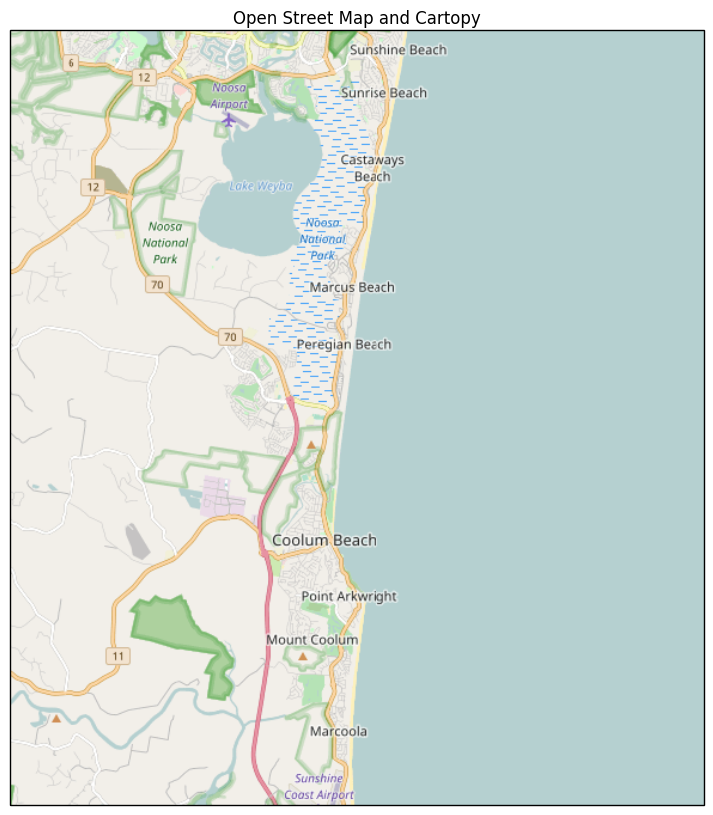

In [10]:
fig = plt.figure(figsize=(10,10))

imagery = OSM()

ax = plt.axes(projection=imagery.crs, )
ax.set_extent(( 153, 153.2, -26.6, -26.4))

# Add the imagery to the map.
zoom = 12
ax.add_image(imagery, zoom)

plt.title('Open Street Map and Cartopy')
plt.show()

### Illustration of Plate Carree projection

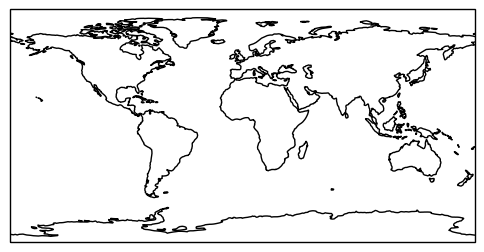

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

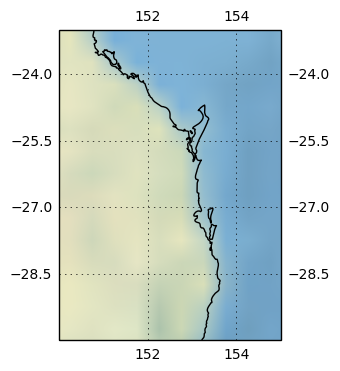

In [9]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((150, 155, -30, -23))
ax.stock_img()
ax.coastlines(resolution='10m',)
ax.gridlines(draw_labels=True, xlocs=[150, 152, 154, 155])
plt.show()

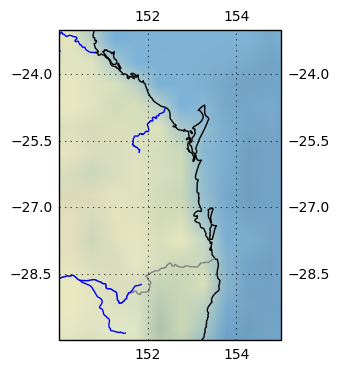

In [10]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((150, 155, -30, -23))
ax.stock_img()    
# Create a feature for States/Admin 1 regions at 1:10m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')

rivers = cfeature.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='10m',
    facecolor='none')

ax.coastlines(resolution='10m',)
ax.add_feature(states_provinces, edgecolor='gray')
ax.add_feature(rivers, edgecolor='blue')

ax.gridlines(draw_labels=True, xlocs=[150, 152, 154, 155])
plt.show()

Skipping  No usual address (Aust.)
Skipping  Migratory - Offshore - Shipping (Aust.)


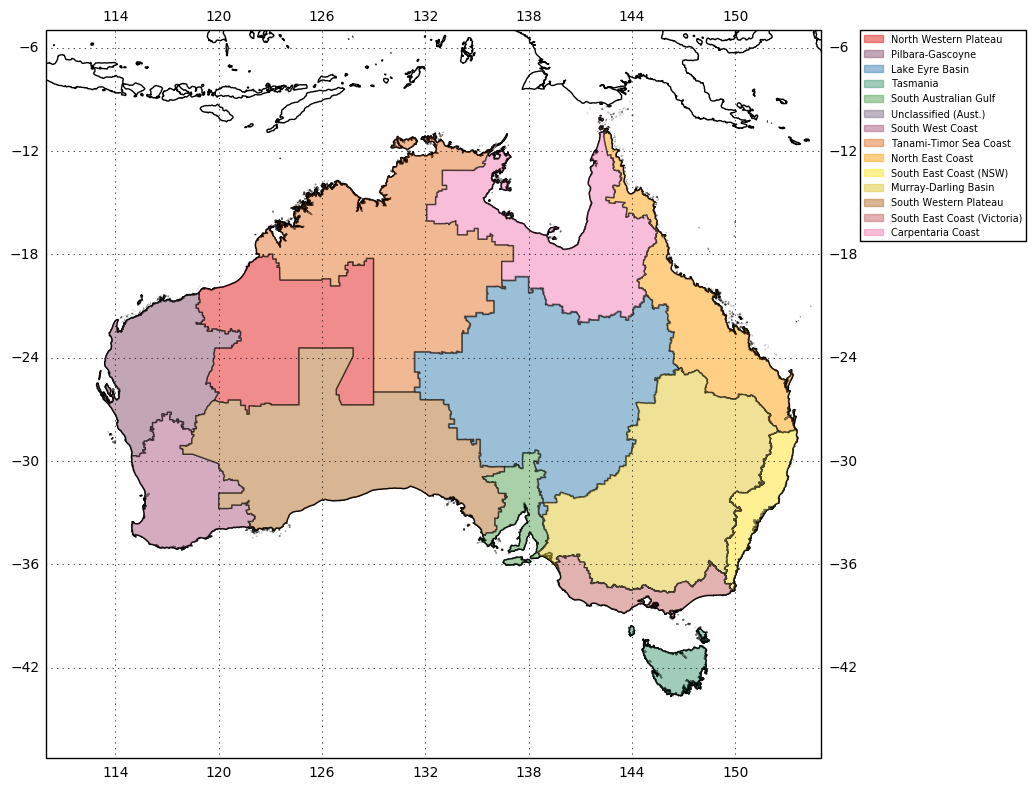

In [11]:



fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m',)
ax.gridlines(draw_labels=True)


add_shp = '../data/ADD_2016_AUST'

shp = shapereader.Reader(add_shp)
add_s = shp.records()

names = []
for add in add_s:
    name =(add.attributes['ADD_NAME16'])
    names.append(name)
#end for
# get a color for each unique name
N = len(names)
base = plt.cm.get_cmap('Set1')
color_list = base(np.linspace(0, 1, N))
names_color={name:color for name,color in zip(names,color_list)}

ADD_alpha = 0.5
add_s = shp.records()
bad_names = ['D94', 'D97']
handles=[]
for add in add_s:
    name = (add.attributes['ADD_NAME16'])
    if( add.attributes['ADD_CODE16'] in bad_names):
        print('Skipping ',name)
    else:
        if( add.geometry == None):
            pass
        else:
            ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                              edgecolor='black', label = name, color=names_color[name], alpha = ADD_alpha)
            # create invisible patches to create legend  (proxy artist
            handles.append(mpatches.Patch(color=names_color[name], label=name, alpha=ADD_alpha))
        #end if
    #endif
#end for

plt.legend(handles=handles, fontsize=7, \
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.show()

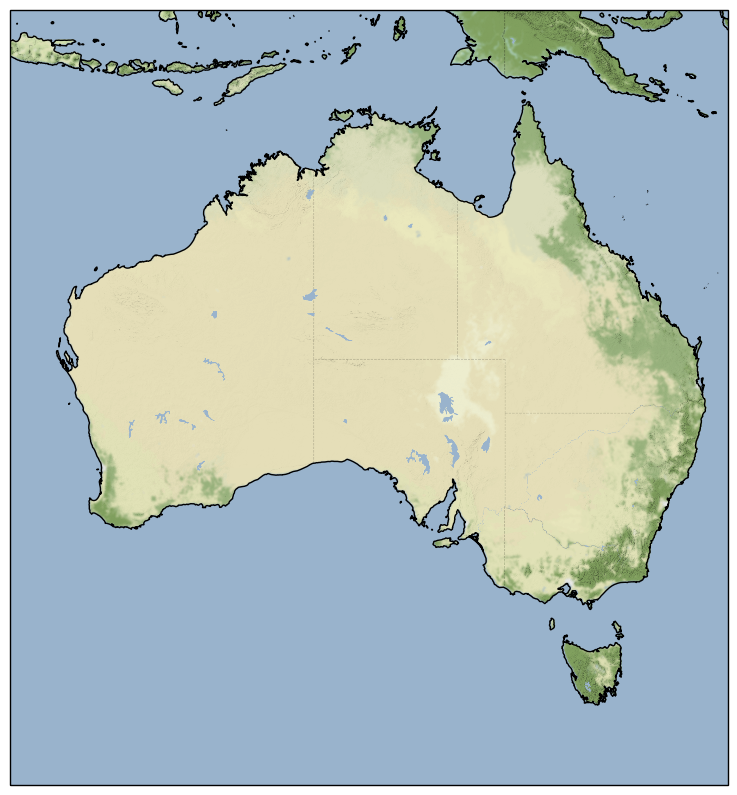

In [12]:
from cartopy.io.img_tiles import StamenTerrain

fig = plt.figure(figsize=(10,10))

tiler = StamenTerrain()
mercator = tiler.crs
ax = plt.axes(projection=mercator)
ax.set_extent((110, 155, -45, -5))

zoom = 6
ax.add_image(tiler, zoom )

ax.coastlines('10m')
plt.show()

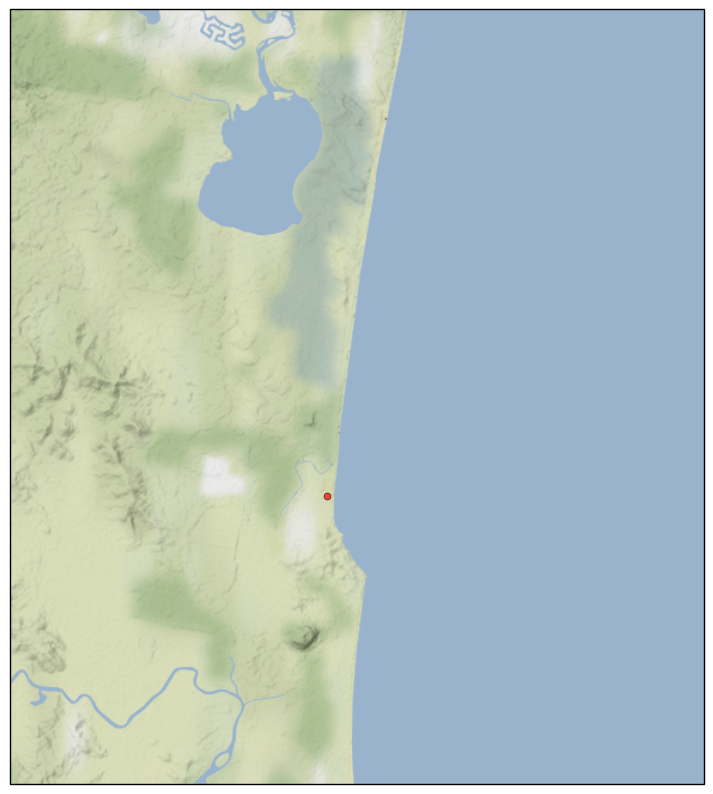

In [13]:


fig = plt.figure(figsize=(10,10))

tiler = StamenTerrain()
mercator = tiler.crs
ax = plt.axes(projection=mercator)

ax.set_extent(( 153, 153.2, -26.6, -26.4))

zoom = 12
ax.add_image(tiler, zoom )

# even 1:10m are too coarse for .2 degree square
#ax.coastlines('10m')

home_lat, home_lon = -26.5258277,153.0912987
# Add a marker for home
plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
         alpha=0.7, transform=ccrs.Geodetic())

plt.show()

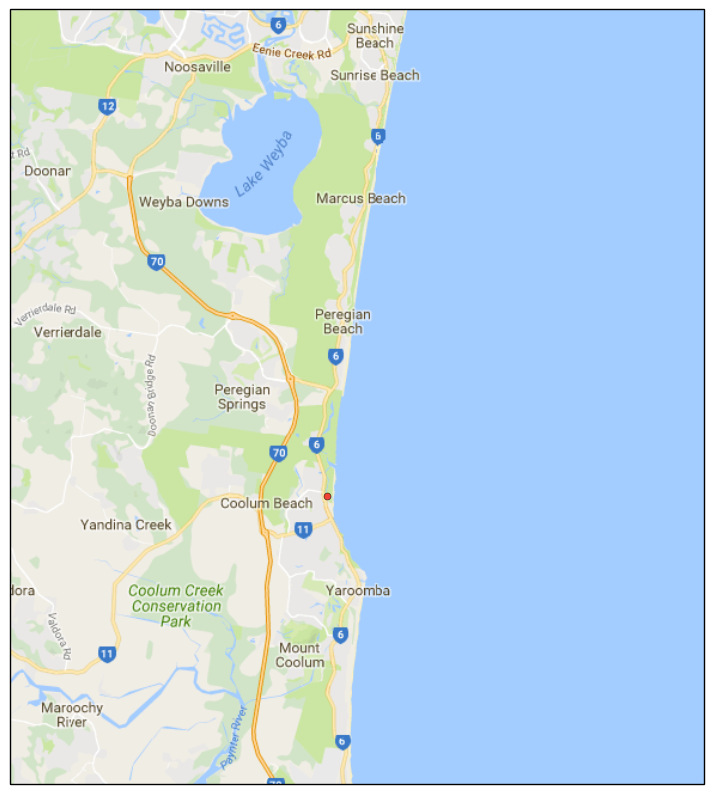

In [14]:
fig = plt.figure(figsize=(10,10))

tiler = GoogleTiles()
mercator = tiler.crs
ax = plt.axes(projection=mercator)

ax.set_extent(( 153, 153.2, -26.6, -26.4))

zoom = 12
ax.add_image(tiler, zoom )

# even 1:10m are too coarse for .2 degree square
#ax.coastlines('10m')

home_lat, home_lon = -26.5258277,153.0912987
# Add a marker for home
plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
         alpha=0.7, transform=ccrs.Geodetic())

plt.show()

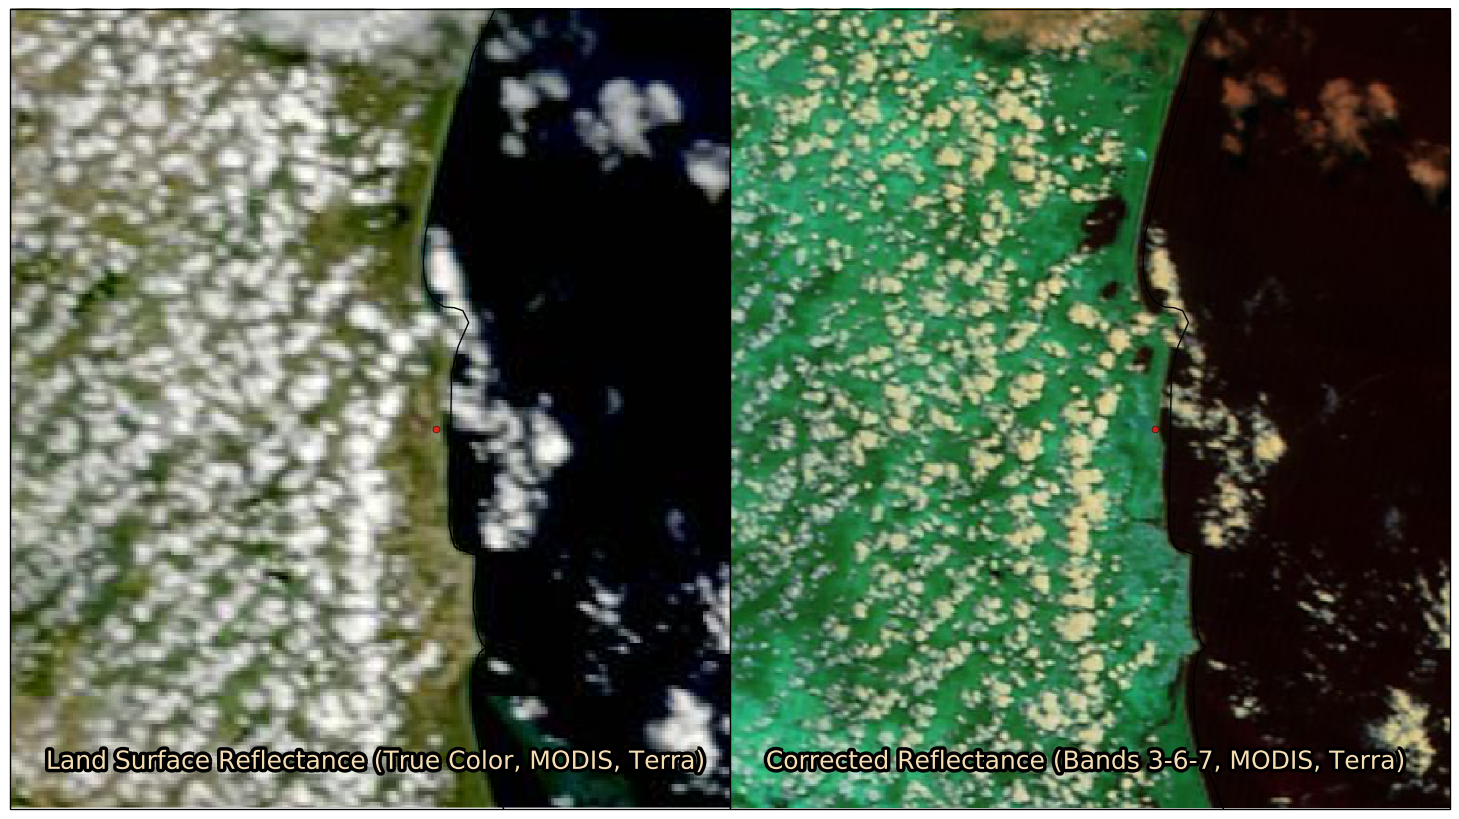

In [16]:
# URL of NASA GIBS
URL = 'http://gibs.earthdata.nasa.gov/wmts/epsg4326/best/wmts.cgi'
wmts = WebMapTileService(URL)

# Layers for MODIS true color and snow RGB
layers = ['MODIS_Terra_SurfaceReflectance_Bands143',
          'MODIS_Terra_CorrectedReflectance_Bands367']

date_str = '2017-02-05'

# Plot setup
plot_CRS = ccrs.Mercator()
geodetic_CRS = ccrs.Geodetic()
# ( 153, 153.2, -26.6, -26.4) home
# (110, 155, -45, -5) Australia

lat0 = -27
lat1 = -26
lon0 = 152.5
lon1 = 153.5

x0, y0 = plot_CRS.transform_point(lon0, lat0, geodetic_CRS)
x1, y1 = plot_CRS.transform_point(lon1, lat1, geodetic_CRS)
ysize = 8
xsize = 2 * ysize * (x1 - x0) / (y1 - y0)
fig = plt.figure(figsize=(xsize, ysize), dpi=100)

for layer, offset in zip(layers, [0, 0.5]):
    ax = plt.axes([offset, 0, 0.5, 1], projection=plot_CRS)
    ax.set_xlim((x0, x1))
    ax.set_ylim((y0, y1))
    ax.add_wmts(wmts, layer, wmts_kwargs={'time': date_str})
    
    home_lat, home_lon = -26.5258277,153.0912987
    # Add a marker for home
    plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
         alpha=0.7, transform=ccrs.Geodetic())
    
    txt = plt.text(lon0+0.05, lat0+0.05, wmts[layer].title, fontsize=18,
               color='wheat', transform=geodetic_CRS)    
    txt.set_path_effects([PathEffects.withStroke(linewidth=5,
                                             foreground='black')])

        
    ax.coastlines('10m')
#end for

plt.show()

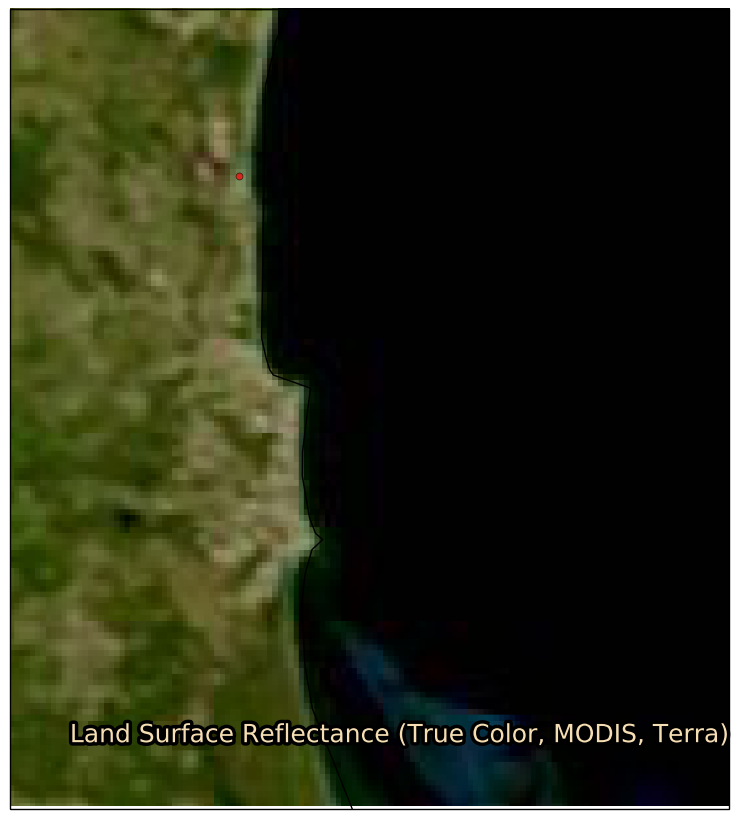

In [20]:
# URL of NASA GIBS
URL = 'http://gibs.earthdata.nasa.gov/wmts/epsg4326/best/wmts.cgi'
wmts = WebMapTileService(URL)

# Layers for MODIS true color and snow RGB
layers = ['MODIS_Terra_SurfaceReflectance_Bands143',
          'MODIS_Terra_CorrectedReflectance_Bands367']

date_str = '2017-02-12'

# Plot setup
plot_CRS = ccrs.Mercator()
geodetic_CRS = ccrs.Geodetic()
# ( 153, 153.2, -26.6, -26.4) home
# (110, 155, -45, -5) Australia

lat0 = -27
lat1 = -26.4
lon0 = 152.9
lon1 = 153.5

x0, y0 = plot_CRS.transform_point(lon0, lat0, geodetic_CRS)
x1, y1 = plot_CRS.transform_point(lon1, lat1, geodetic_CRS)
ysize = 8
xsize = 2 * ysize * (x1 - x0) / (y1 - y0)
fig = plt.figure(figsize=(xsize, ysize), dpi=100)


    
ax = plt.axes([0, 0, 1, 1], projection=plot_CRS)
ax.set_xlim((x0, x1))
ax.set_ylim((y0, y1))
ax.add_wmts(wmts, layers[0], wmts_kwargs={'time': date_str})

home_lat, home_lon = -26.5258277,153.0912987
# Add a marker for home
plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
     alpha=0.7, transform=ccrs.Geodetic())

txt = plt.text(lon0+0.05, lat0+0.05, wmts[layers[0]].title, fontsize=18,
           color='wheat', transform=geodetic_CRS)    
txt.set_path_effects([PathEffects.withStroke(linewidth=5,
                                         foreground='black')])


ax.coastlines('10m')


plt.show()

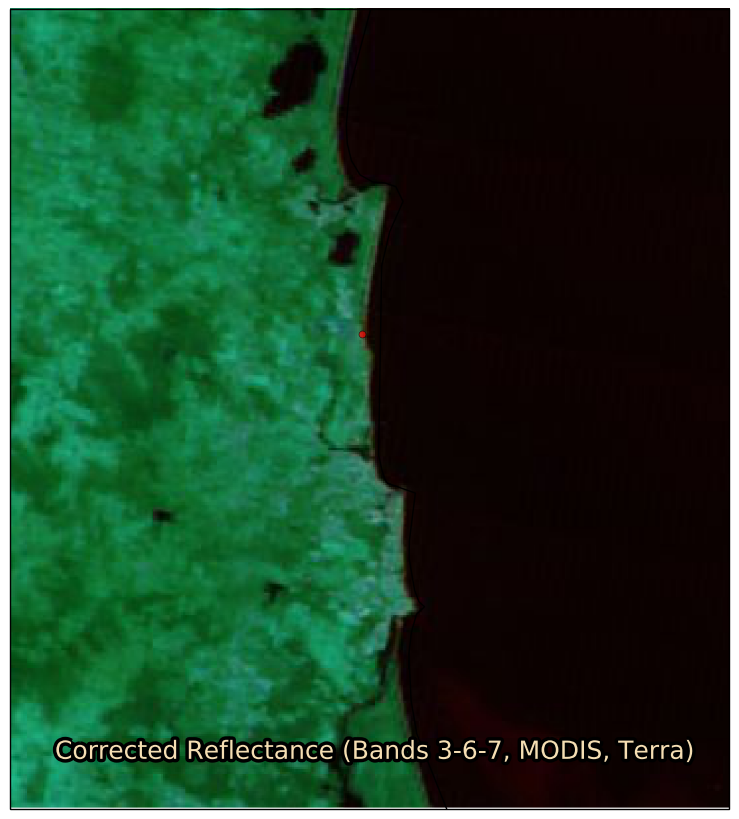

In [19]:
# URL of NASA GIBS
URL = 'http://gibs.earthdata.nasa.gov/wmts/epsg4326/best/wmts.cgi'
wmts = WebMapTileService(URL)

# Layers for MODIS true color and snow RGB
layers = ['MODIS_Terra_SurfaceReflectance_Bands143',
          'MODIS_Terra_CorrectedReflectance_Bands367']

date_str = '2017-02-12'

# Plot setup
plot_CRS = ccrs.Mercator()
geodetic_CRS = ccrs.Geodetic()
# ( 153, 153.2, -26.6, -26.4) home
# (110, 155, -45, -5) Australia

lat0 = -27
lat1 = -26.2
lon0 = 152.7
lon1 = 153.5

x0, y0 = plot_CRS.transform_point(lon0, lat0, geodetic_CRS)
x1, y1 = plot_CRS.transform_point(lon1, lat1, geodetic_CRS)
ysize = 8
xsize = 2 * ysize * (x1 - x0) / (y1 - y0)
fig = plt.figure(figsize=(xsize, ysize), dpi=100)


    
ax = plt.axes([0, 0, 1, 1], projection=plot_CRS)
ax.set_xlim((x0, x1))
ax.set_ylim((y0, y1))
ax.add_wmts(wmts, layers[1], wmts_kwargs={'time': date_str})

home_lat, home_lon = -26.5258277,153.0912987
# Add a marker for home
plt.plot(home_lon, home_lat, marker='o', color='red', markersize=5,
     alpha=0.7, transform=ccrs.Geodetic())

txt = plt.text(lon0+0.05, lat0+0.05, wmts[layers[1]].title, fontsize=18,
           color='wheat', transform=geodetic_CRS)    
txt.set_path_effects([PathEffects.withStroke(linewidth=5,
                                         foreground='black')])


ax.coastlines('10m')


plt.show()

Skipping  No usual address (Aust.)
Skipping  Migratory - Offshore - Shipping (Aust.)


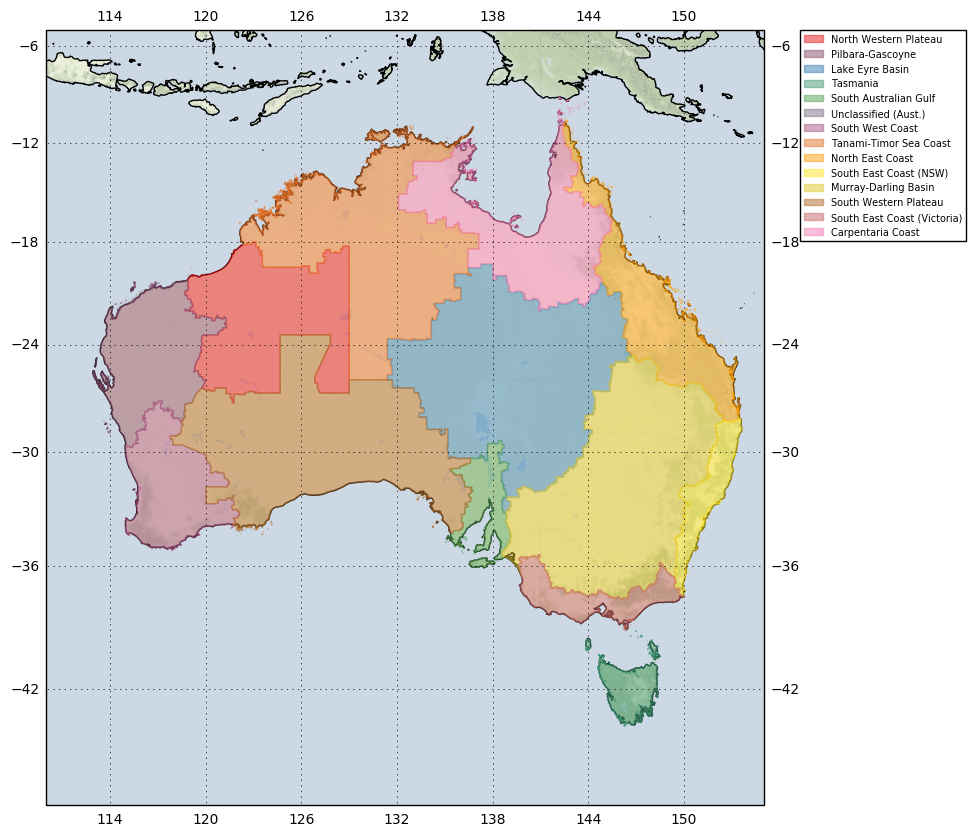

In [7]:
fig = plt.figure(figsize=(10,10))

tiler = StamenTerrain()
mercator = tiler.crs

ax = plt.axes(projection=mercator)
ax.set_extent((110, 155, -45, -5))
ax.coastlines(resolution='10m',)
ax.gridlines(draw_labels=True)


add_shp = '../data/ADD_2016_AUST'

shp = shapereader.Reader(add_shp)
add_s = shp.records()

names = []
for add in add_s:
    name =(add.attributes['ADD_NAME16'])
    names.append(name)
#end for
# get a color for each unique name
N = len(names)
base = plt.cm.get_cmap('Set1')
color_list = base(np.linspace(0, 1, N))
names_color={name:color for name,color in zip(names,color_list)}

ADD_alpha = 0.5
add_s = shp.records()
bad_names = ['D94', 'D97']
handles=[]
for add in add_s:
    name = (add.attributes['ADD_NAME16'])
    if( add.attributes['ADD_CODE16'] in bad_names):
        print('Skipping ',name)
    else:
        if( add.geometry == None):
            pass
        else:
            ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                              edgecolor='black', label = name, color=names_color[name], alpha = ADD_alpha)
            # create invisible patches to create legend  (proxy artist
            handles.append(mpatches.Patch(color=names_color[name], label=name, alpha=ADD_alpha))
        #end if
    #endif
#end for


zoom = 6
ax.add_image(tiler, zoom , alpha=0.5)

plt.legend(handles=handles, fontsize=7, \
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.show()

### Display associated webpages (eg source of data)

In [11]:
pass

### Save figures to figures directory

In [3]:
def save_figure(fig_title='Figure'):

    try:
        fname     = FIGURE_PREFIX+fig_title+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'.jpg'
        plt.savefig(fname)
        print(fname+' saved.')
    except IOError as err:
        print('Unable to save figure - IO Error!')
        print("IO error: {0}".format(err))
    except OSError as err:
        print('Unable to save figure - OS Error!')
        print("OS error: {0}".format(err))
    except:
        print('Unable to save figure - Unexpected Error!')
        print("Unexpected error:", sys.exc_info()[0])
        raise
    #end try
#end save_figure

### Display images

In [4]:
pass

## Conclusions / Summary